# Lab 1

**Lecture**: Deep Learning (Prof. Dr. David Rügamer, Emanuel Sommer)

> Kudos to the former contributors to/creators of the lab materials Emilio Dorigatti and Tobias Weber.

Welcome to the very first lab, in which we will have fun with logistic regression.

## Imports

In [1]:
import torch
from torch import Tensor

import matplotlib.pyplot as plt
from  matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Exercise 1

Suppose you have five input points, $\textbf{x}_1=(0,0)^\top$, $\textbf{x}_2=(1,0)^\top$,
$\textbf{x}_3=(0,-1)^\top$, $\textbf{x}_4=(-1,0)^\top$ and $\textbf{x}_5=(0,1)^\top$, and
the corresponding classes are $y_1=y_2=y_3=0$ and $y_4=y_5=1$:

In [34]:
x = torch.tensor([
    [0, 0],
    [1, 0],
    [0, -1],
    [-1, 0],
    [0, 1]
])
y = torch.tensor([0, 0, 0, 1, 1])
labs = ['$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$']

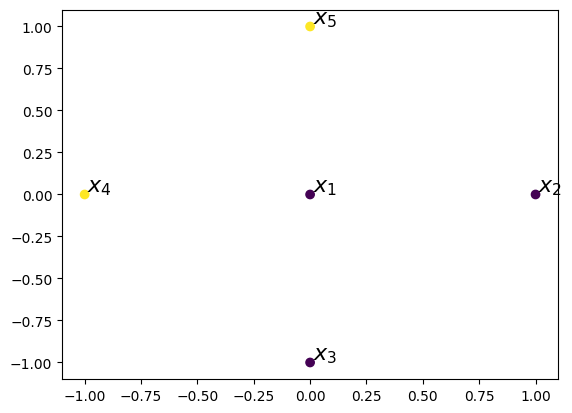

In [35]:
def plot_scatter(x: torch.tensor, y: torch.tensor, labs: torch.tensor) -> None:
    """Utility function to plot a scatter plot of the data"""
    # copy the input tensors to avoid modifying the original ones
    x = x.clone().detach().numpy()
    y = y.clone().detach().numpy()
    plt.scatter(x[:, 0], x[:, 1], c=y)
    for i, lab in enumerate(labs):
        plt.annotate(
            lab, (x[i, 0], x[i, 1]), size=16,
            xytext=(2, 2), textcoords='offset points'
        )
    plt.show()
    plt.close()

plot_scatter(x, y, labs)

Consider a logistic regression model
$\hat{y}_i=\sigma\left(\alpha_0+\alpha_1x_{i1}+\alpha_2x_{i2}\right)$, with
$\sigma(\cdot)$ the sigmoid function, $\sigma(x)=\left(1+e^{-x}\right)^{-1}$.
What values for $\alpha_0$, $\alpha_1$ and $\alpha_2$ would result in the correct
classification for this dataset? A positive label is predicted when the output of the
sigmoid is larger or equal than 0.5.

**Note**: do not use any formulas or automated methods to find the answer.
Think for yourself. A logistic regression classifier is nothing more than a hyper-plane
separating points of the two classes. If necessary, review vectors, dot-products and
their geometrical interpretation in linear algebra. This applies to the following
exercises, too.

We add a first column of ones, which is used for the 'bias'.

In [36]:
x_design = torch.cat([torch.ones(5, 1), x], dim=1)

In [39]:
a0 = (-0.5*15
# TODO fill in the value for alpha 0.
)

a1 = (-1*15
# TODO fill in the value for alpha 1.
)

a2 = (1*15
# TODO fill in the value for alpha 2.
)

a = torch.tensor([a0, a1, a2], dtype=torch.float)

# We define a custom sigmoid function
def sigmoid(x: Tensor) -> Tensor:
    return 1/(1+torch.exp(-1*x))
# TODO compute and return the sigmoid transformation on x.

# Calculate predictions
scores = sigmoid(x_design @ a)

# Let's investigate the obtained scores.
def print_scores(target: Tensor, scores: Tensor) -> None:
    print('\tTarget\tScore')
    [print('{}\t{}\t{:.3f}'.format('x' + str(i), int(t), float(s)))
     for i, (t, s) in enumerate(zip(target, scores), start=1)]

print_scores(y, scores)

	Target	Score
x1	0	0.001
x2	0	0.000
x3	0	0.000
x4	1	0.999
x5	1	0.999


You should make sure that the last two values are close to one and the others
are close to zero.

**Note:** There are many valid parametrization that lead to a separating hyperplane. How would you prioritize between them?


## Exercise 2

Continuing from the previous exercise, suppose now that $y_2=y_3=1$ and $y_1=y_2=y_5=0$.

In [40]:
y = torch.tensor([0, 1, 1, 0, 0])

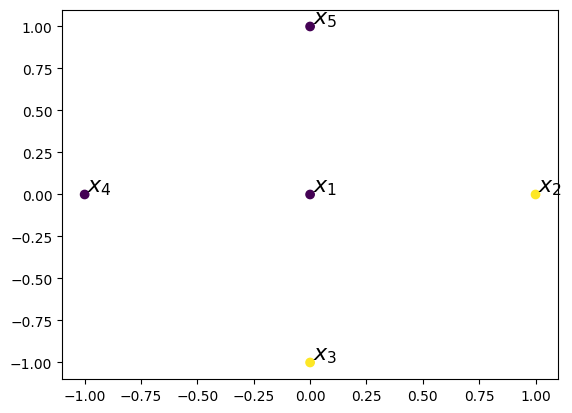

In [41]:
plot_scatter(x, y, labs)

Consider the same logistic regression model above with coefficients $\beta_0$, $\beta_1$
and $\beta_2$, how would you need to set these coefficients to correctly classify this
dataset?

In [42]:
b0 = (-0.5*15
# TODO fill in the value for beta 0.
)

b1 = (1*15
# TODO fill in the value for beta 1.
)

b2 = (-1*15
# TODO fill in the value for beta 2.
)

b = torch.tensor([b0, b1, b2], dtype=torch.float)

print_scores(y, sigmoid(x_design @ b))

	Target	Score
x1	0	0.001
x2	1	0.999
x3	1	0.999
x4	0	0.000
x5	0	0.000


Make sure that the second and third elements are close to one, and the others close to zero.

## Exercise 3

Finally, with the same data as before, suppose that $y_1=1$ and $y_2=y_3=y_4=y_5=0$:

In [43]:
y = torch.tensor([1, 0, 0, 0, 0])

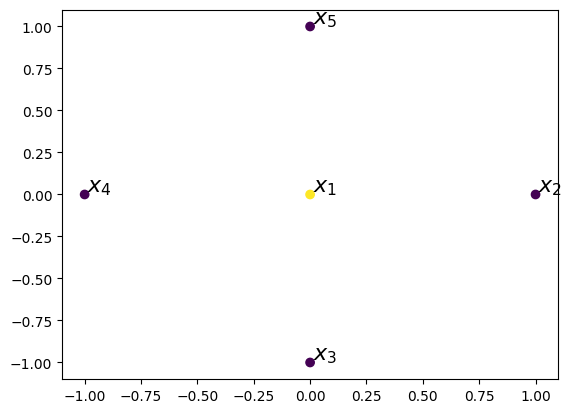

In [44]:
plot_scatter(x, y, labs)

Clearly, logistic regression cannot correctly classify this dataset, since the two classes are not linearly separable (optional: prove it, see solution at the bottom).

However, as we have shown in the previous exercises, it is possible to separate $x_2$ and $x_3$ from the rest, and $x_4$ and $x_5$ from the rest.

Can these two simple classifiers be composed into one that is powerful enough to separate $x_1$ from the rest?

Can we use their predictions as input for another logistic regression classifier?

Let $z_{i1}=\sigma(\alpha_0+\alpha_1x_{i1}+\alpha_2x_{i2})$ and $z_{i2}=\sigma(\beta_0+\beta_1x_{i1}+\beta_2x_{i2})$ be the output of the two logistic regression classifiers for point $i$. Then, the dataset would become:

| $i$ | $z_{i1}$ | $z_{i2}$ | $y$ |
|-----:|:----------:|:----------:|:-----|
| $1$ |        0 |        0 |   1 |
| $2$ |        0 |        1 |   0 |
| $3$ |        0 |        1 |   0 |
| $4$ |        1 |        0 |   0 |
| $5$ |        1 |        0 |   0 |

In graphical form:

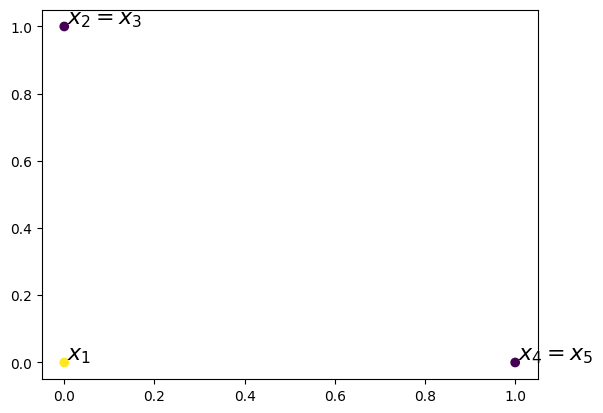

In [45]:
x_axis = [0, 0, 1]
y_axis = [0, 1, 0]
plt.scatter(x_axis, y_axis, c=[1, 0, 0])
for i, lab in enumerate(['$x_1$', '$x_2 = x_3$', '$x_4 = x_5$']):
    plt.annotate(
        lab, (x_axis[i], y_axis[i]), size=16,
        xytext=(2, 2), textcoords='offset points',
    )

plt.show()

This sure looks linearly separable! As before, find the coefficients for a linear
classifier $\hat{y}_i=\sigma\left(\gamma_0+\gamma_1z_{i1}+\gamma_2z_{i2}\right)$:

In [46]:
g0 = (0.5*15
# TODO fill in the value for gamma 0.
)

g1 = (-1*15
# TODO fill in the value for gamma 1.
)

g2 = (-1*15
# TODO fill in the value for gamma 2.
)

g = torch.tensor([g0, g1, g2], dtype=torch.float)

z = torch.tensor([
  [1, 0, 0,],
  [1, 0, 1,],
  [1, 0, 1,],
  [1, 1, 0,],
  [1, 1, 0]
], dtype=torch.float)

print_scores(y, sigmoid(z @ g))

	Target	Score
x1	1	0.999
x2	0	0.001
x3	0	0.001
x4	0	0.001
x5	0	0.001


Make sure that the first element is close to one, and the others close to zero.

This big classifier can be summarized as follows:

In [47]:
z1 = sigmoid(x_design @ a)
z2 = sigmoid(x_design @ b)

print_scores(y, sigmoid(g0 + g1 * z1 + g2 * z2))

	Target	Score
x1	1	0.999
x2	0	0.001
x3	0	0.001
x4	0	0.001
x5	0	0.001


And this is just what a neural network looks like!
Each neuron is a simple linear classifier, and we just stack linear classifiers on
top of linear classifiers. And we could go on and on, with many layers of linear
classifiers.